In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 300)
pd.set_option("max_colwidth", 200)

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from numpy import arange
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn import preprocessing

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SequentialFeatureSelector

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

import matplotlib.pyplot as plt
import statistics
import seaborn as sns

In [2]:
df = pd.read_csv('Ordinal+Ridge.csv')

In [3]:
df.head(3)

,Unnamed: 0,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,Unnamed: 0.1,PID,GrLivArea,SalePrice,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,Ridge
0,0,6.0,5.0,1.0,1.0,3.0,3.0,0.0,0.0,0.0,21.0,2.0,2.0,0.0,2.0,1.0,0.0,13.0,14.0,2.0,3.0,4.0,1.0,5.0,5.0,3.0,5.0,6.0,1.0,4.0,1.0,4.0,4.0,6.0,2.0,5.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,5.0,4.0,9.0,4.0,1,909176150,856,126000,68.516053,7890,6,6,1939,1950,0.0,238.0,0.0,618.0,856.0,856,0,0,1.0,0.0,1,0,2,1,4,1,1939.0,2.0,399.0,0,0,0,0,166,0,0,119695.642722
1,1,0.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,7.0,2.0,2.0,4.0,2.0,1.0,0.0,6.0,6.0,1.0,2.0,4.0,1.0,2.0,5.0,2.0,2.0,0.0,1.0,4.0,1.0,4.0,2.0,6.0,3.0,1.0,0.0,5.0,5.0,2.0,3.0,4.0,1.0,4.0,3.0,9.0,4.0,2,905476230,1049,139500,42.000000,4235,5,5,1984,1984,149.0,552.0,393.0,104.0,1049.0,1049,0,0,1.0,0.0,2,0,2,1,5,0,1984.0,1.0,266.0,0,105,0,0,0,0,0,118142.328347
2,2,6.0,1.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,11.0,2.0,2.0,0.0,2.0,3.0,0.0,8.0,8.0,2.0,2.0,4.0,0.0,5.0,5.0,3.0,0.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,3.0,5.0,3.0,5.0,4.0,0.0,3.0,4.0,1.0,2.0,1.0,9.0,4.0,3,911128020,1001,124900,60.000000,6060,5,9,1930,2007,0.0,737.0,0.0,100.0,837.0,1001,0,0,0.0,0.0,1,0,2,1,5,0,1930.0,1.0,216.0,154,0,42,86,0,0,0,129798.673755


In [4]:
X_ordinal = df.drop(['SalePrice'], axis=1).values
Y_ordinal = df.SalePrice.values

In [5]:
X_ordinal.shape

(2580, 83)

In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(X_ordinal,Y_ordinal,test_size=0.25)

scaler = preprocessing.StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
    
gbm = GradientBoostingRegressor()
gbm.fit(X_train_scaled, Y_train)
GBM_Score = gbm.score(X_test_scaled, Y_test)

In [39]:
GBM_Score

0.9451716729497656

In [44]:
gbm.feature_importances_

array([3.93063666e-04, 8.99528843e-05, 1.56842978e-04, 0.00000000e+00,
       0.00000000e+00, 2.12281797e-05, 1.45989417e-04, 0.00000000e+00,
       5.67748179e-05, 0.00000000e+00, 1.40299187e-03, 1.38401152e-05,
       9.94436867e-04, 4.67758758e-05, 4.13547919e-07, 2.15080175e-05,
       1.54575519e-04, 2.48762338e-06, 2.56385376e-05, 4.81608527e-05,
       4.75564293e-04, 0.00000000e+00, 0.00000000e+00, 1.23516281e-04,
       3.19685440e-05, 6.90781676e-05, 1.84277524e-04, 6.39942370e-05,
       0.00000000e+00, 3.08311916e-06, 4.48893713e-04, 2.29100198e-05,
       5.44390078e-05, 1.36720931e-04, 3.12103614e-05, 4.94012497e-04,
       0.00000000e+00, 1.63560249e-04, 1.06240747e-04, 0.00000000e+00,
       0.00000000e+00, 8.40805922e-06, 0.00000000e+00, 6.25372408e-05,
       1.84800229e-04, 4.10843994e-05, 1.77186379e-04, 3.61061713e-04,
       4.83894989e-04, 4.16477703e-03, 1.20673728e-04, 1.58390011e-03,
       1.49669051e-03, 1.35949699e-03, 1.48193833e-03, 7.40645669e-04,
      

In [45]:
X_cols = df.drop(['SalePrice'], axis=1).columns
sorted_importance = sorted(zip(X_cols, gbm.feature_importances_), key=lambda t:t[1], reverse=True)
sorted_importance

[('Ridge', 0.9683713602857676),
 ('GrLivArea', 0.004164777030743808),
 ('OpenPorchSF', 0.0029602339546143893),
 ('1stFlrSF', 0.0018038158158388126),
 ('GarageArea', 0.001602220787241874),
 ('LotArea', 0.0015839001078428296),
 ('BsmtFinSF1', 0.0015664433742477815),
 ('OverallQual', 0.0014966905136023336),
 ('YearBuilt', 0.0014819383256500051),
 ('Neighborhood', 0.0014029918733620863),
 ('OverallCond', 0.0013594969938647333),
 ('Condition2', 0.000994436866736321),
 ('MasVnrArea', 0.0008842159049823829),
 ('TotalBsmtSF', 0.0007471279035616367),
 ('YearRemodAdd', 0.0007406456692769832),
 ('Fireplaces', 0.0005713897663602069),
 ('GarageYrBlt', 0.0005587186777753545),
 ('2ndFlrSF', 0.0005501266094850882),
 ('GarageType', 0.0004940124974146531),
 ('FullBath', 0.0004856034111885559),
 ('PID', 0.00048389498885481266),
 ('ExterQual', 0.00047556429299169307),
 ('CentralAir', 0.0004488937130068116),
 ('BedroomAbvGr', 0.0004151037750390372),
 ('Unnamed: 0', 0.00039306366619950526),
 ('Unnamed: 0.1'

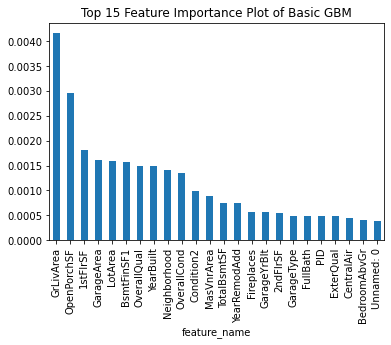

In [48]:
a, b = zip(*sorted_importance[1:25]) # this splits the list of tuples into two lists
pd.DataFrame({'feature_name':a, 'importance_score':b}).plot.bar(x='feature_name',y='importance_score', legend=None)
plt.title('Top 15 Feature Importance Plot of Basic GBM');

In [40]:
X_ordinal_scaled = scaler.transform(X_ordinal)
len(X_ordinal_scaled)

2580

In [41]:
predicted_value = gbm.predict(X_ordinal_scaled)

In [42]:
true_value = Y_ordinal

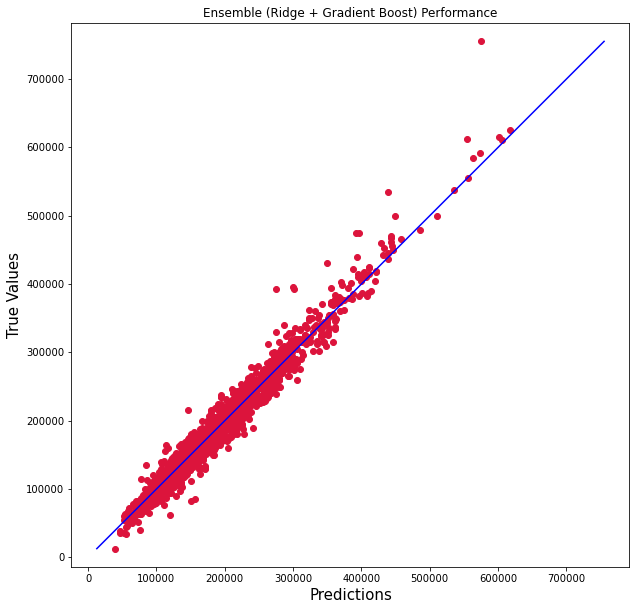

In [43]:
plt.figure(figsize=(10,10))
plt.scatter(predicted_value, true_value, c='crimson')
#plt.yscale('log')
#plt.xscale('log')

plt.title('Ensemble (Ridge + Gradient Boost) Performance')
p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Predictions', fontsize=15)
plt.ylabel('True Values', fontsize=15)
plt.axis('equal')
plt.show()